In [1]:
pip install numpy matplotlib opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

Car dimentions are : (427, 640, 3)


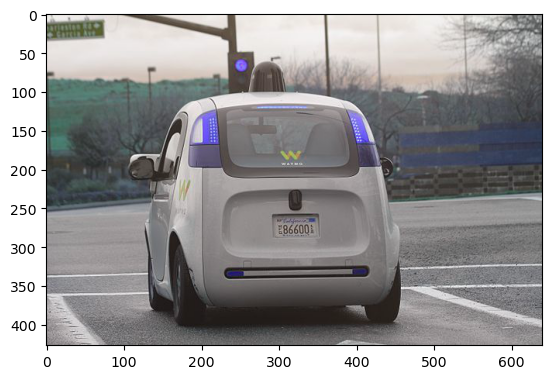

In [10]:
# Read image 
image = mpimg.imread('images/waymo_car.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

# Print the image dimensions
print('Car dimentions are :', image.shape)

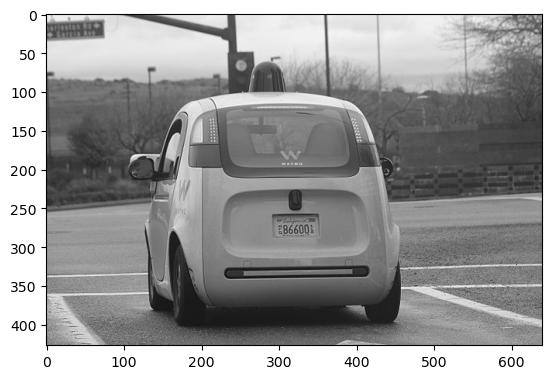

In [7]:
# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')

In [11]:
# Prints specific grayscale pixel values

x = 400
y = 300

print(gray_image[y, x])

159


In [12]:
# Finds the maximum and minimum grayscale values in this image

max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print("Max :", max_val)
print("Min :", min_val)

Max : 255
Min : 2


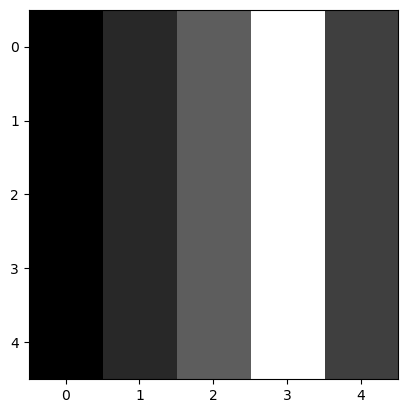

In [25]:
# Create a 5x5 image using just grayscale, numerical values

tiny_image = np.array([[0, 15, 34, 93, 23],
                      [0, 15, 34, 93, 23],
                      [0, 15, 34, 93, 23],
                      [0, 15, 34, 93, 23],
                      [0, 15, 34, 93, 23]])


plt.imshow(tiny_image, cmap='gray')

## RGB colorspace

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

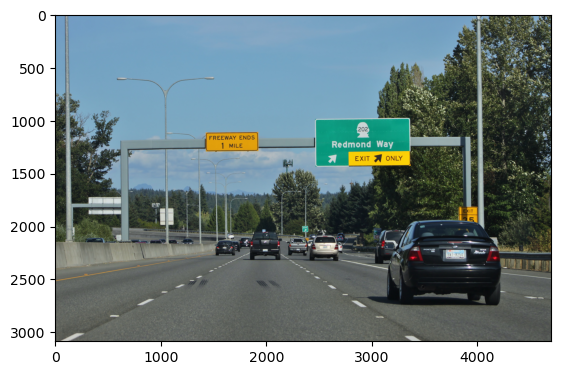

In [28]:
# Read in the image
image = mpimg.imread('images/wa_state_highway.jpg')
plt.imshow(image)

### RGB channels 

Visualize the levels of each color channel. Pay close attention to the traffic signs!

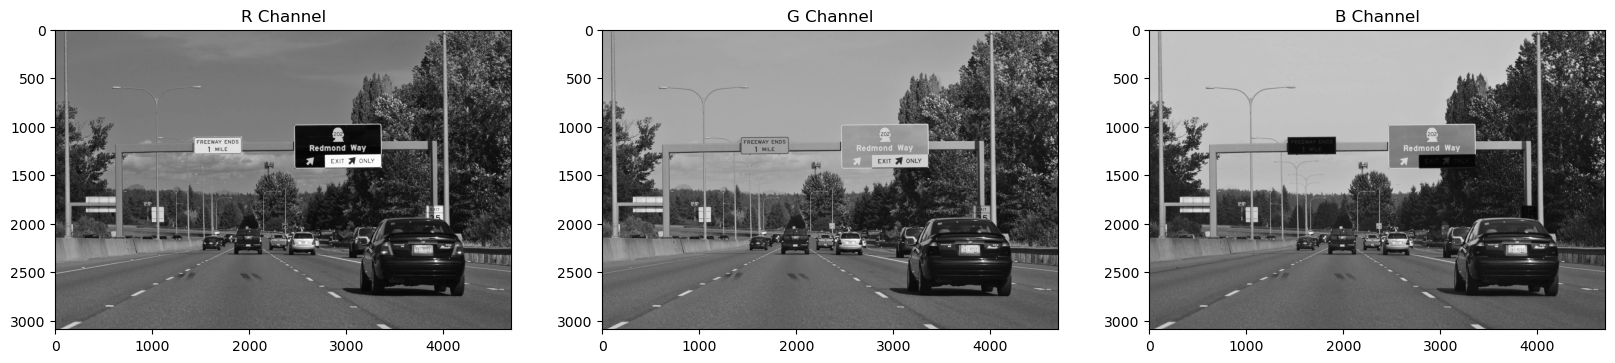

In [30]:
# Isolate RGB channels 
r = image[:, :, 0]
g = image[:, :, 1]
b = image[:, :, 2]

#Visualize the individual color channels 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.set_title('R Channel')
ax1.imshow(r, cmap='gray')
ax2.set_title("G Channel")
ax2.imshow(g, cmap='gray')
ax3.set_title('B Channel')
ax3.imshow(b, cmap='gray')

## Coding a Blue Screen

In [2]:
# Import resources 
import matplotlib.pyplot as plt
import numpy as np
import cv2



In [3]:
# Read in display image 
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print our the info about the image
print("this image is :", type(image),
     "with dimenstions of :", image.shape)


this image is : <class 'numpy.ndarray'> with dimenstions of : (514, 816, 3)


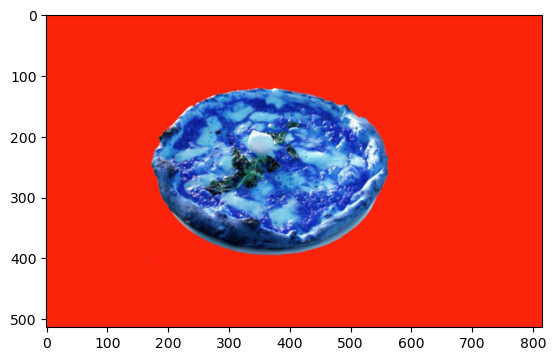

In [4]:
%matplotlib inline

# Display the image here 
plt.imshow(image) # We loaded the blue image but it is showing the red image why ?

##### OPEN CV reads images as 'BGR' not 'RGP' so we have to convert to 'RGB' if we want to use them as per our requirements

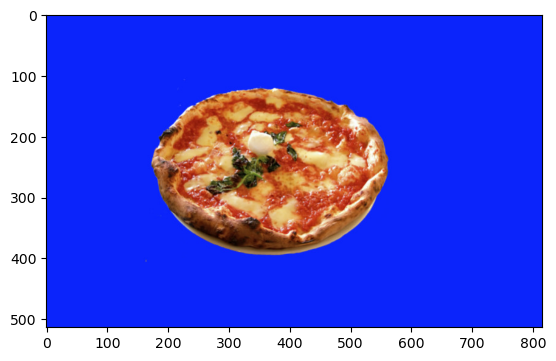

In [5]:
# Copy the original image and perform the tasks on that 
image_copy = np.copy(image)

#Change the color from BGR to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the code
plt.imshow(image_copy)



In [15]:
# Define the color thresholddr
lower_blue = np.array([0, 0, 200])
upper_blue = np.array([70, 70, 255])

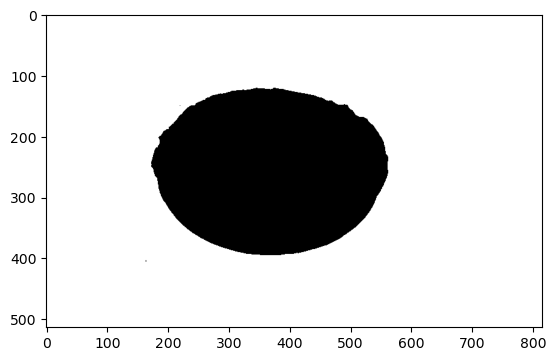

In [16]:
# Create a mask 

mask = cv2.inRange(image_copy, lower_blue, upper_blue)

#Visualize he mask
plt.imshow(mask, cmap='gray')

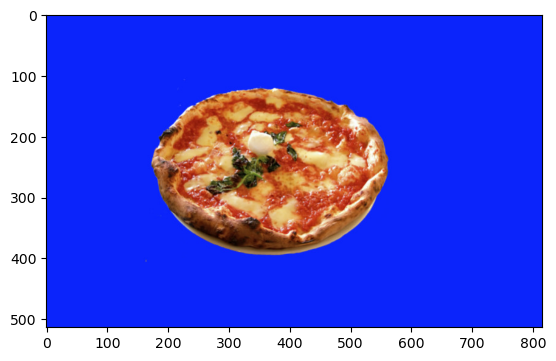

In [20]:
masked_image = np.copy(image_copy)

plt.imshow(masked_image, cmap='gray')

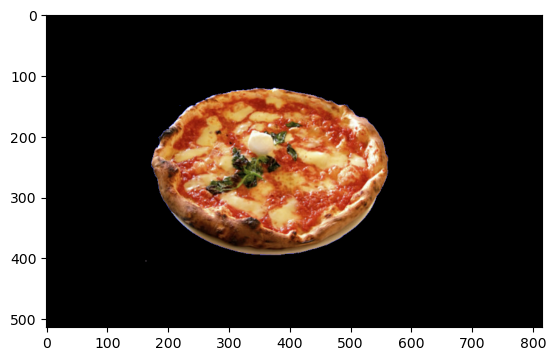

In [22]:
#Mask the image, let only pizza show through 
masked_image[mask != 0] = [0, 0, 0] # we are saying in the above image, apart from the mask remaining all parts of the image should become the black 

plt.imshow(masked_image, cmap='gray')

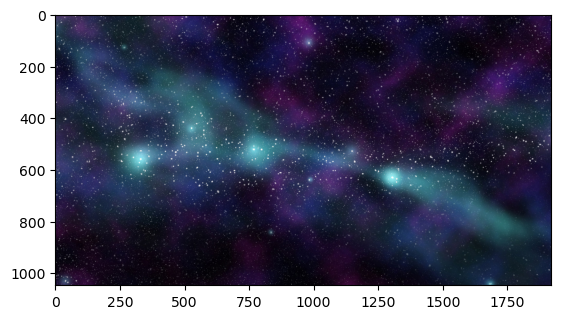

In [24]:
## Mask and add a background image
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

#show it 
plt.imshow(background_image)

In [28]:
# Let's resize as per the image we have to replace with 

crop_background = background_image[0:514, 0:816]
print(crop_background.shape)

(514, 816, 3)


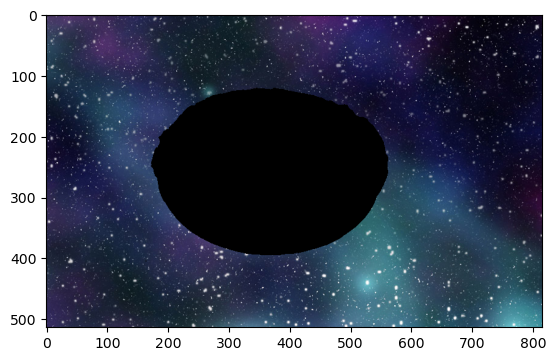

In [31]:
# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0]= [0,0,0]
plt.imshow(crop_background)

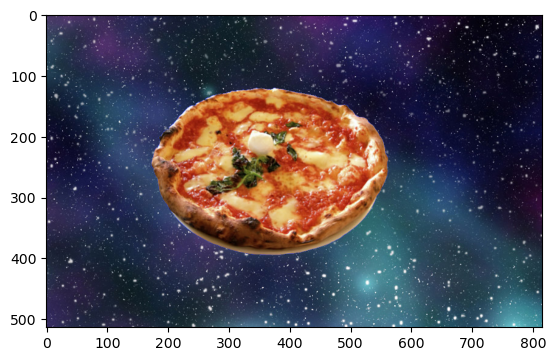

In [32]:
complete_image = masked_image + crop_background

plt.imshow(complete_image)


### Color Threshold, Green Screen


In [33]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import cv2
import numpy as np

%matplotlib inline


#### Read in and display the image

The dimensions of the image is : (450, 660, 3)


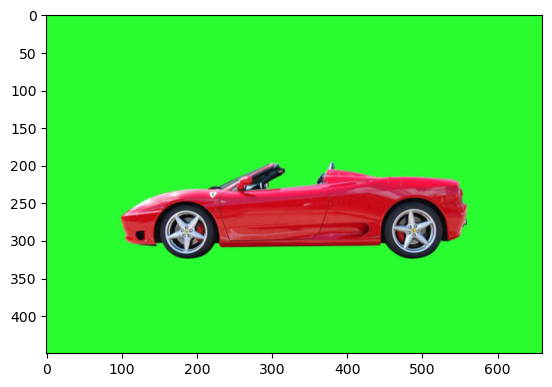

In [35]:
# Read the image
image = mpimg.imread('images/car_green_screen.jpg')
plt.imshow(image)
print(f"The dimensions of the image is : {image.shape}")

### Define the color threshold

In [49]:
lower_green = np.array([0,200,0])
upper_green = np.array([90, 255, 90])

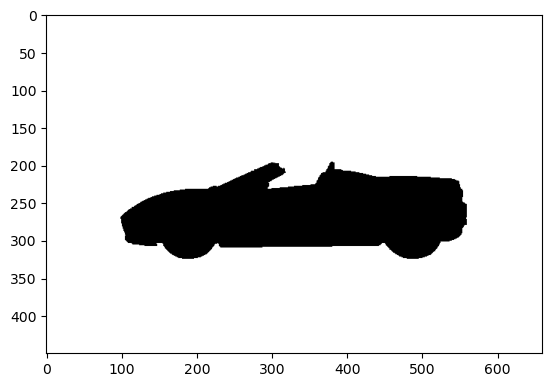

In [50]:
### Create a mask 
mask = cv2.inRange(image, lower_green, upper_green)

plt.imshow(mask, cmap='gray')

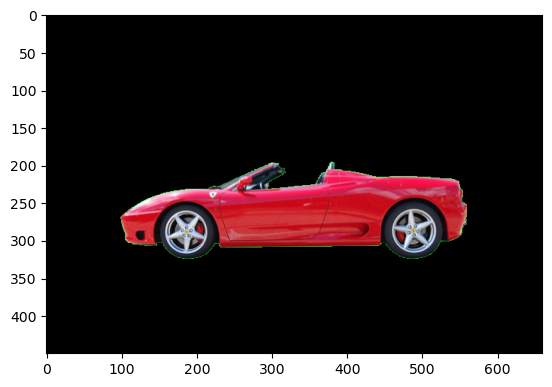

In [53]:
## Mask the image to let the car show through 

masked_image = np.copy(image)

masked_image[mask != 0]=[0, 0, 0]

plt.imshow(masked_image)

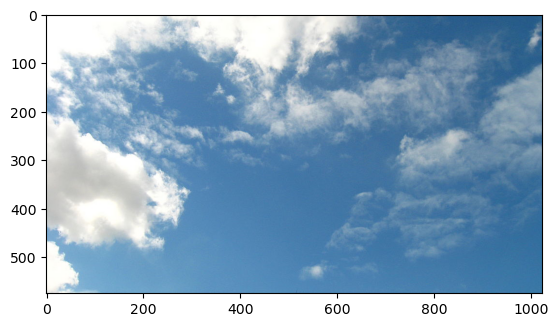

In [54]:
# Background image 

background_image = mpimg.imread('images/sky.jpg')
plt.imshow(background_image)

In [55]:
crop_background = background_image[0:450, 0:660]
print(f"The dimensions are : {crop_background.shape}")

The dimensions are : (450, 660, 3)


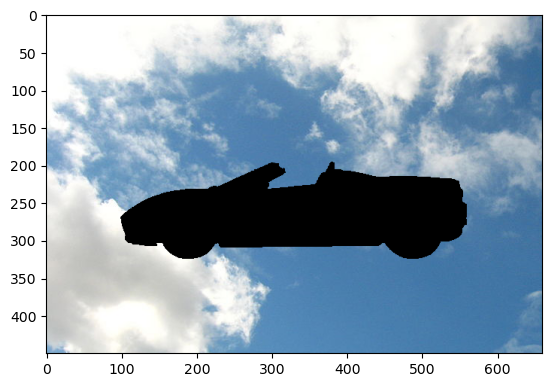

In [58]:
# Create a mask now to show the car through 
crop_background_copy = np.copy(crop_background)
crop_background_copy[mask==0] = [0, 0, 0]
plt.imshow(crop_background_copy)


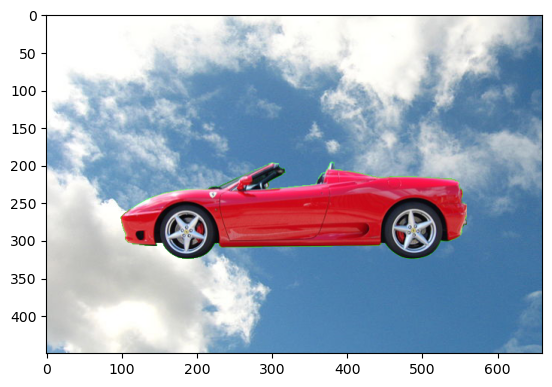

In [59]:
complete_image = crop_background_copy + masked_image

plt.imshow(complete_image)